In [1]:
import sklearn
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import pickle
import os
import joblib 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_pickle("./train_data.pkl")
df_test = pd.read_pickle("./test_data.pkl")

In [3]:
X_train = df_train.drop(['prijs'], axis=1)
y_train = df_train[['prijs']]

X_test = df_train.drop(['prijs'], axis=1)
y_test = df_train[['prijs']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tf, X_valid, y_train_tf, y_valid = train_test_split(X_train, y_train)

5/5 [==============================] - 0s 964us/step - loss: 148948.2812 - mae: 304.5161 - mse: 148948.2812


(0.0, 329.0)

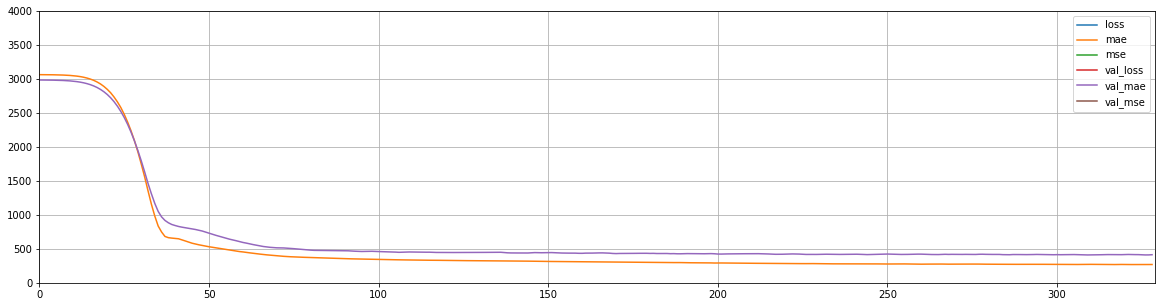

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(12, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(6, activation="relu"),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.008)

model.compile(
    loss="mean_squared_error", 
    optimizer=optimizer, 
    metrics=['mae', 'mse']
)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(
    X_train_tf, 
    y_train_tf, 
    batch_size=32, 
    epochs=500, 
    validation_data=(X_valid, y_valid),
    verbose=0,
    callbacks=[callback]
)

mse_test = model.evaluate(X_test, y_test)

pd.DataFrame(history.history).plot(figsize=(20, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 4000) 
plt.gca().set_xlim(0, len(history.history['loss'])) 

In [199]:
model_version = "0001"
model_name = "TFAuto"
model_path = os.path.join(model_name) 
model.save(model_path)
scaler_path = os.path.join(model_name, 'TFScaler.pkl') 
joblib.dump(scaler, scaler_path) 

INFO:tensorflow:Assets written to: TFAuto/assets


['TFAuto/TFScaler.pkl']